## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Number of rows
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# Unique users
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [5]:
# Proportion of users coverted. We use the mean.
df['converted'].mean()

0.11965919355605512

In [6]:
# Proportion in percentage
df['converted'].mean()*100

11.965919355605511

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# Get the times the new_page and treatment don't line up throw:
# Get times that treatment and old_page line up
gr_e1 = df.query("group == 'treatment' and landing_page == 'old_page'")

In [8]:
# Get times that control and new_page line up
gr_e2 = df.query("group == 'control' and landing_page == 'new_page'")

In [9]:
# Get the times the new_page and treatment don't line up
print("Times new_page and treatment don't line up is {}".format(len(gr_e1) + len(gr_e2)))

Times new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [10]:
# Info function to check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No values are missing.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Delete Rows
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)


In [12]:
# Delete Rows
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [13]:
#Save the new changes
df.to_csv('ab_new.csv', index=False)

In [14]:
# Read the new data set
df2 = pd.read_csv('ab_new.csv')

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
# Unique values for user_id in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
# Check the duplicates user_id in df2
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [18]:
# Information about the repeat user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
#Drop the duplicates
df2.drop_duplicates (inplace=True)

In [20]:
#Check duplicates
df2['user_id'].duplicated().sum()

1

In [21]:
#Delete the duplicates
time_dup = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != time_dup]

In [22]:
#Check duplicates
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
#Probability  of an individual converting regardless of the page they receive
df['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
# Group by groups to answer the question
df_group = df.groupby('group')
df_group.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

The probability they converted in the control group is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

The probability they converted in the treatment group is 0.118807

d. What is the probability that an individual received the new page?

In [25]:
# Number of users who got new page
n_user = len(df.query("group == 'treatment'"))

# Calculate total number of users
users=df.shape[0]

# Probability of users that receive the new page
p_user = n_user/users
p_user

0.5000636646764286

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

- Given that an individual was in the treatment group, the probability they converted is 0.118807
- Given that an individual was in the control group, the probability they converted is 0.120386
- We find that old page does better.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


Hypothesis

$H_{0}$ : $p_{new}$ - $p_{old}$ <= 0 

$H_{1}$ : $p_{new}$ - $p_{old}$ > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
# Calculate probability of conversion for new page
p_new = df2['converted'].mean()
print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
# COnvert rate for pold
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c. What is $n_{new}$?

In [28]:
# n-new is: 
n_new = len(df2.query("group == 'treatment'"))
n_new


145310

d. What is $n_{old}$?

In [29]:
# n-old is:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
p_mean = np.mean([p_new, p_old])


In [31]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
new_page_converted.mean()

0.11979216846741449

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
old_page_converted.mean()

0.11868606908324958

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
# Calculate difference in p under the null hypothesis
new_page_converted.mean()-old_page_converted.mean()

0.0011060993841649075

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [34]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

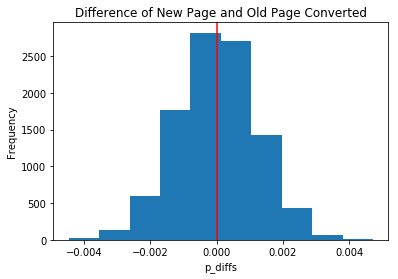

In [35]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.axvline(x=(p_new-p_old), color='r')
plt.title('Difference of New Page and Old Page Converted');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff

-0.0015790565976871451

In [41]:
p_diffs = np.array(p_diffs)
p_diffs

array([ -9.72313148e-04,   5.32104456e-05,  -7.31568165e-04, ...,
        -7.86716671e-04,  -3.87259641e-04,  -8.07201883e-04])

In [49]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv
(act_diff < p_diffs).mean()

0.90639999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- We are computing p-values here.
- This is the probability of observing our statistic if the null hypothesis is true.
- The more extreme in favor of the alternative portion of this statement determines the shading associated with your p-value.
- We conclude that null hypothesis is true as old and new pages perform almost similarly.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [50]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [51]:
# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [52]:
from scipy.stats import norm

print(norm.cdf(z_score))
# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))


0.905058312759
1.64485362695


- We find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.
- These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [54]:
df2_new = df2

In [55]:
df2_new['intercept'] = pd.Series(np.zeros(len(df2_new)), index=df2_new.index)
df2_new['ab_page'] = pd.Series(np.zeros(len(df2_new)), index=df2_new.index)

In [56]:
# Find indexes that need to be changed for treatment group
index_change = df2_new[df2_new['group']=='treatment'].index

# Change values
df2_new.set_value(index=index_change, col='ab_page', value=1)
df2_new.set_value(index=df2_new.index, col='intercept', value=1)

# Change datatype
df2_new[['intercept', 'ab_page']] = df2_new[['intercept', 'ab_page']].astype(int)

# Move "converted" to RHS
df2_new = df2_new[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

In [57]:
df2_new[df2_new['group']=='treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [58]:
import statsmodels.api as sm
# Set up logistic regression
logit = sm.Logit(df2_new['converted'], df2_new[['ab_page', 'intercept']])

# Calculate results
results=logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:08:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  

The p-value associated with treatment is: 0.190. This p-value is different from the p-values calculated in Part II which was 0.9. This is because this is a two-sided test and the tests in Part II were a one-sided test.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- We should consider other factors into the regression model as they might influence the conversions too. Timestamps are inlcuded but without regionality, they do not indicate if seasonality was a factor or not. 

- The disadvantages to adding additional terms into the regression model is that even with additional factors we can never account for all influencing factors or accomodate them. Plus, small pilots and pivots sometimes work better in practice than long-drawn research without execution.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [60]:
# Importing data
df_countries = pd.read_csv('countries.csv')

df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [61]:
# Creating dummy variables
df_d = pd.get_dummies(data=df_countries, columns=['country'])

# Performing join
df3 = df_d.merge(df2_new, on='user_id') # df.join is depricated AFAIK

# Sorting columns
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_CA', 'country_UK', 'country_US',
           'intercept', 'converted']]

# Fix Data Types
df3[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df3[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df3.head()

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [62]:
# Create logit_countries object
logit_countries = sm.Logit(df3['converted'], 
                           df3[['country_UK', 'country_US', 'intercept']])

# Fit
result1 = logit_countries.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [63]:
# Results
result1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2018-03-28 11:12 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [65]:
# Create logit_countries object
logit_countries2 = sm.Logit(df3['converted'], 
                           df3[['ab_page', 'country_UK', 'country_US', 'intercept']])

# Fit
result2 = logit_countries2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [66]:
# Results
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2018-03-28 11:14 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
==================================================================

"""

- When adding everything together it seems that the p-values for all featues has increased. The z-score for the intercept is incredibly large though which is interesting.


<a id='conclusions'></a>
## Conclusions

- The performance of the old page was found better as computed by different techniques.
- We accept the Null Hypothesis and Reject the Alternate Hypothesis.
- These inferences are strictly based on data. 

